# Correlations between variables

In this example, we demonstrate how to apply correlations between random variables using a `correlation matrix`. When correlations are introduced, the variables no longer vary independently in the variable space but become related to each other. This affects all reliability, uncertainty, and sensitivity simulations.

> Note: two random variables can also be correlated using copula functions.

First, let's import the necessary classes:

In [61]:
from probabilistic_library import UncertaintyProject, DistributionType, UncertaintyMethod

We consider the Hunt's limit state function:

In [62]:
from utils.models import hunt

We create an uncertainty project using the `UncertaintyProject()` class and refer to Hunt’s model.

In [63]:
project = UncertaintyProject()
project.model = hunt

project.model.print()

Model hunt:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z


We assume the following distributions for the variables:

In [64]:
project.variables["t_p"].distribution = DistributionType.uniform
project.variables["t_p"].minimum = 2
project.variables["t_p"].maximum = 4

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.uniform
project.variables["h_s"].minimum = 0
project.variables["h_s"].maximum = 1

project.variables["h_crest"].distribution = DistributionType.log_normal
project.variables["h_crest"].mean = 10
project.variables["h_crest"].deviation = 0.05

project.variables["h"].distribution = DistributionType.uniform
project.variables["h"].minimum = 0
project.variables["h"].maximum = 5

### Uncorrelated variables

We first run the uncertainty analysis without correlations (all variables are assumed independent). We use the `crude_monte_carlo` calculation technique and plot the realizations of variables $h_s$ (wave height) and $t_p$ (peak period).

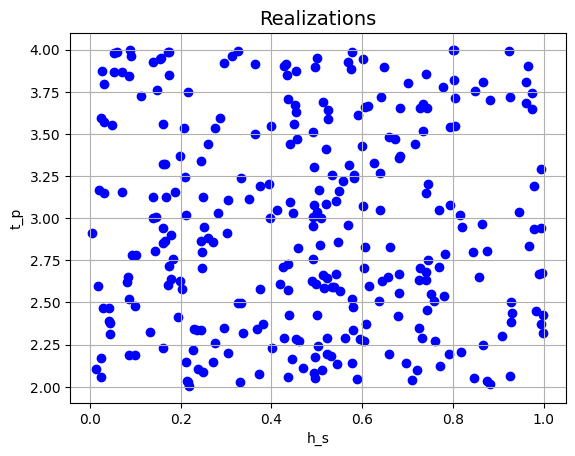

In [65]:
project.settings.uncertainty_method = UncertaintyMethod.crude_monte_carlo
project.settings.minimum_samples = 300
project.settings.maximum_samples = 300
project.settings.save_realizations = True

project.run()

plt = project.result.get_plot_realizations('h_s', 't_p')
plt.show()

### Correlated variables (positive correlation)

Let's now correlate the variables $h_s$ and $t_p$ using `project.correlation_matrix[]`. We apply a positive correlation coefficient of $0.9$, which implies that higher wave heights are associated with higher wave periods.

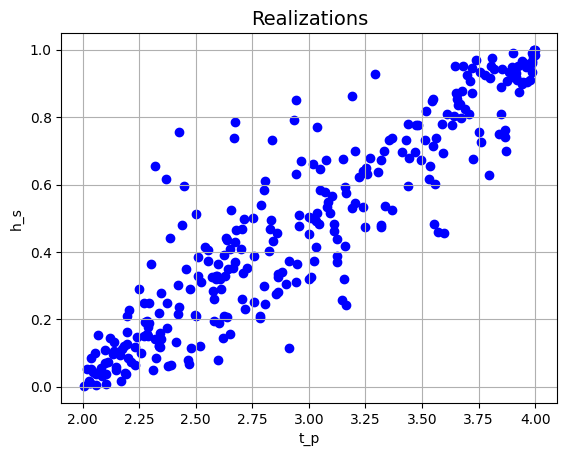

In [66]:
project.correlation_matrix['h_s', 't_p'] = 0.9

project.run()

plt = project.result.get_plot_realizations('t_p', 'h_s')
plt.show()


Now, let’s apply a negative correlation coefficient of $-0.9$, which means that when $h_s$ increases, $t_p$ tends to decrease.

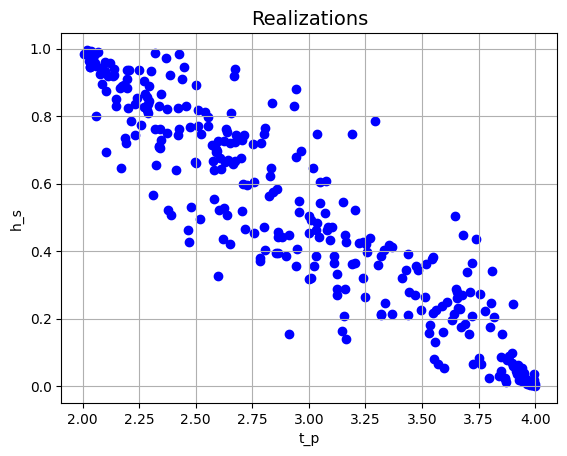

In [67]:
project.correlation_matrix['h_s', 't_p'] = -0.9

project.run()

plt = project.result.get_plot_realizations('t_p', 'h_s')
plt.show()

If the correlation coefficient is $0.0$, the variables are independent:

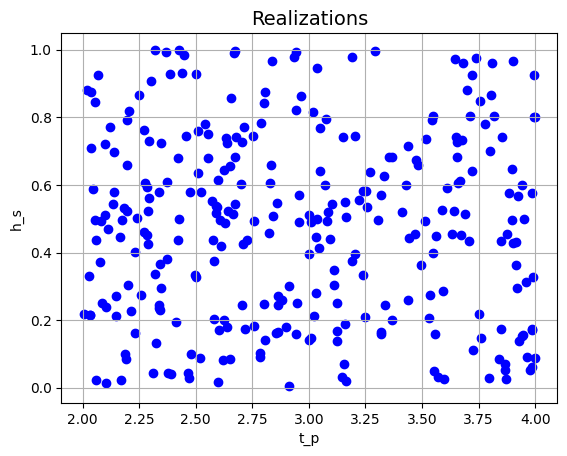

In [68]:
project.correlation_matrix['h_s', 't_p'] = 0.0

project.run()

plt = project.result.get_plot_realizations('t_p', 'h_s')
plt.show()

The correlation can be set only between variables that are present in the model. Otherwise, an error message is displayed:

In [69]:
project.correlation_matrix['h_s', 'non_existing_variable'] = 0.8

Variable non_existing_variable is not available, value is not set.
